In [ ]:
import cv2 
import dlib
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.spatial import distance
from collections import OrderedDict
import math
from imutils import paths, resize
from tqdm import tqdm
import pandas as pd
import os

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Load train set

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS331/features_data.csv')

In [ ]:
data['label'] = le.fit_transform(data['label'])

In [ ]:
data = data.drop(columns='Unnamed: 0')

In [ ]:
data.head(10)

,0,1,2,3,4,5,6,7,8,9,label
0,136.003676,143.013985,228.0,109.224539,151.119158,74.108029,37.013511,66.974508,49.455603,278.064646,0
1,139.003597,145.055162,219.0,99.764723,154.012986,78.160092,40.012498,59.036243,42.969086,287.176208,0
2,146.030819,159.012578,256.0,128.701204,168.107109,83.054199,43.011626,63.946505,45.629599,280.928783,0
3,139.003597,148.054044,234.0,118.848643,166.048186,78.230429,41.109610,67.750976,51.490772,278.435497,0
4,134.000000,139.014388,225.0,106.775465,155.012903,76.105190,39.051248,59.264512,45.379437,278.130102,0
5,142.003521,150.003333,237.0,108.903627,156.051274,80.006250,42.011903,64.592282,45.744059,281.612089,0
6,134.003731,140.003571,222.0,96.208108,145.031031,75.106591,38.013156,62.783888,43.315316,283.392498,0
7,133.003759,134.003731,222.0,104.804580,152.052622,78.006410,40.000000,65.224859,48.094058,276.305717,0
8,137.014598,145.031031,233.0,104.062481,145.013792,75.026662,39.012818,62.818889,42.273689,276.682486,0
9,130.061524,138.057959,216.0,96.213305,137.058382,70.064256,36.055513,71.113913,52.177246,282.850983,0


In [ ]:
data.rename(columns = {'0':'D1', '1':'D2',
                              '2':'D3', '3':'D4', '4' : 'D5', '5': 'D6', '6': 'D7', '7': 'A1', '8': 'A2','9': 'A3'} , inplace = True)

In [ ]:
data['R1'] = data['D2']/data['D1']
data['R2'] = data['D1']/data['D3']
data['R3'] = data['D2']/data['D3']
data['R4'] = data['D1']/data['D5']
data['R5'] = data['D6']/data['D5']
data['R6'] = data['D4']/data['D6']
data['R7'] = data['D6']/data['D1']
data['R8'] = data['D5']/data['D2']
data['R9'] = data['D4']/data['D5']
data['R10'] = data['D7']/data['D6']

In [ ]:
data.drop(columns='label').corrwith(data['label'])

D1     0.035348
D2     0.010818
D3    -0.340733
D4    -0.198815
D5     0.218340
D6     0.407370
D7     0.335807
A1     0.449185
A2     0.363176
A3    -0.231080
R1    -0.023177
R2     0.433793
R3     0.312719
R4    -0.267365
R5     0.353424
R6    -0.520940
R7     0.461236
R8     0.234959
R9    -0.415742
R10   -0.107922
dtype: float64

In [ ]:
data.describe()

,D1,D2,D3,D4,D5,D6,D7,A1,A2,A3,...,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,136.595976,144.254866,225.463366,103.963001,152.941892,79.713660,41.322775,68.220142,47.905933,280.142603,...,1.056106,0.606460,0.640580,0.894605,0.521237,1.308194,0.583398,1.060567,0.680160,0.518331
std,3.560811,4.961780,9.032186,7.502581,7.763984,5.453011,3.086005,5.613430,4.911681,3.473219,...,0.025282,0.020244,0.028487,0.033780,0.024776,0.105819,0.034097,0.047930,0.041533,0.013145
min,115.004348,123.004065,194.000000,77.794601,125.000000,59.000000,31.144823,41.308614,29.327179,269.230975,...,0.984497,0.526731,0.549002,0.762795,0.417143,0.918720,0.458270,0.870907,0.523920,0.474320
25%,134.003731,141.014184,219.000000,98.858485,148.013513,76.105190,39.051248,64.653824,44.625523,277.770094,...,1.037285,0.593359,0.621195,0.873432,0.503753,1.237395,0.561328,1.028079,0.652705,0.510666
50%,137.000000,144.013888,224.000000,103.392456,153.000000,80.000000,41.048752,68.682088,47.898577,279.980982,...,1.056820,0.607477,0.640925,0.894737,0.520662,1.308216,0.583138,1.060678,0.680827,0.518361
75%,139.003597,147.054412,231.000000,108.466585,158.000000,83.054199,43.046487,71.965714,51.102780,282.264774,...,1.073526,0.620103,0.660633,0.914693,0.537526,1.375021,0.604530,1.091294,0.707107,0.526703
max,153.000000,164.149322,262.000000,139.517024,193.582024,100.005000,54.037024,86.820170,67.190289,294.755158,...,1.157587,0.685201,0.735718,1.085299,0.635148,1.833076,0.720950,1.248539,0.827519,0.566302


# Load test set

In [ ]:
def loadFeatures(path):
    features = list()
    labels = list()
    df = pd.read_csv(path)
    arr = df['Features'].to_numpy()
    labels = df['Labels'].values.tolist()
    for i in arr:
        t = i[1:-1].split(', ')
        feature = [float(x) for x in t]
        features.append(feature)
    return features, labels

In [ ]:
featuresTrain, labelsTrain = loadFeatures('/content/drive/MyDrive/CS331/method/landmark/faceFeature_test.csv')

In [ ]:
test = pd.DataFrame(featuresTrain)

In [ ]:
test.rename(columns = {0:'D1', 1:'D2',
                              2:'D3', 3:'D4', 4 : 'D5', 5: 'D6', 6: 'D7', 7: 'A1', 8: 'A2', 9: 'A3'} , inplace = True)

In [ ]:
test['R1'] = test['D2']/test['D1']
test['R2'] = test['D1']/test['D3']
test['R3'] = test['D2']/test['D3']
test['R4'] = test['D1']/test['D5']
test['R5'] = test['D6']/test['D5']
test['R6'] = test['D4']/test['D6']
test['R7'] = test['D6']/test['D1']
test['R8'] = test['D5']/test['D2']
test['R9'] = test['D4']/test['D5']
test['R10'] = test['D7']/test['D6']

# Feature selection:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = make_pipeline(
StandardScaler(),
SelectFromModel(ExtraTreesClassifier(n_estimators=100), max_features=8),
KNeighborsClassifier()
# DecisionTreeClassifier(max_depth = 30, random_state = 42)
)

In [ ]:
X = data.drop(columns='label')
y = data['label']

In [ ]:
model = clf.fit(X, y)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
clf.named_steps.selectfrommodel.estimator_.feature_importances_.argsort()[-8:]

array([14, 15, 16,  7, 12, 18,  2, 11])

# Preproccesing Data

In [ ]:
X = data.drop(columns='label')
y = data['label']

In [ ]:
X = X.drop(columns=['D1','D2','D4','D5','D6','D7','A2','A3','R1','R3','R4','R8','R10'])

In [ ]:
std = StandardScaler()
X_scale = std.fit_transform(X)

In [ ]:
X_test = test
X_test = X_test.drop(columns=['D1','D2','D4','D5','D6','D7','A2','A3','R1','R3','R4','R8','R10'])
X_test_scale = std.fit_transform(X_test)
y_test = pd.DataFrame(labelsTrain)

In [ ]:
y_test = le.fit_transform(y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model

## Decision tree:

In [ ]:
model = DecisionTreeClassifier(max_depth = 30, random_state = 42)

In [ ]:
model.fit(X_scale, y)

DecisionTreeClassifier(max_depth=30, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scale)

In [ ]:
print('Acc', accuracy_score(y_pred, y_test))

Acc 0.447


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(24.0, 0.5, 'Ground Truth')

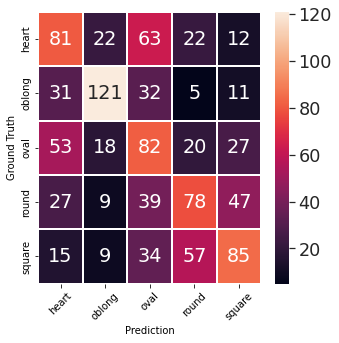

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.6)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xticks(rotation=45)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')


In [ ]:
print(classification_report(y_test, y_pred,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.39      0.41      0.40       200
      oblong       0.68      0.60      0.64       200
        oval       0.33      0.41      0.36       200
       round       0.43      0.39      0.41       200
      square       0.47      0.42      0.45       200

    accuracy                           0.45      1000
   macro avg       0.46      0.45      0.45      1000
weighted avg       0.46      0.45      0.45      1000



## SVM:

In [ ]:
model_svm = SVC()

In [ ]:
model_svm.fit(X_scale, y)

SVC()

In [ ]:
y_pred_svm = model_svm.predict(X_test_scale)

In [ ]:
print('Acc', accuracy_score(y_pred_svm, y_test))

Acc 0.566


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(13.499999999999996, 0.5, 'Ground Truth')

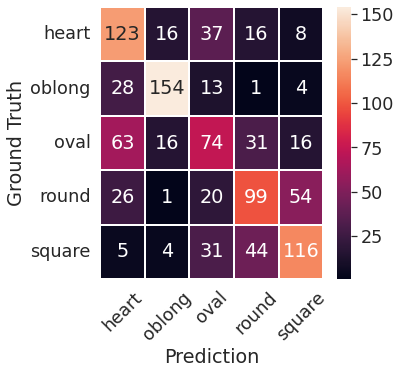

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.6)
cm = confusion_matrix(y_test, y_pred_svm, labels=model.classes_)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xticks(rotation=45)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')


In [ ]:
print(classification_report(y_test, y_pred_svm,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.50      0.61      0.55       200
      oblong       0.81      0.77      0.79       200
        oval       0.42      0.37      0.39       200
       round       0.52      0.49      0.51       200
      square       0.59      0.58      0.58       200

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.56      1000
weighted avg       0.57      0.57      0.56      1000



## KNN:

In [ ]:
model_knn = KNeighborsClassifier()

In [ ]:
model_knn.fit(X_scale, y)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_knn.predict(X_test_scale)

In [ ]:
print('Acc', accuracy_score(y_pred_knn, y_test))

Acc 0.527


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(13.499999999999996, 0.5, 'Ground Truth')

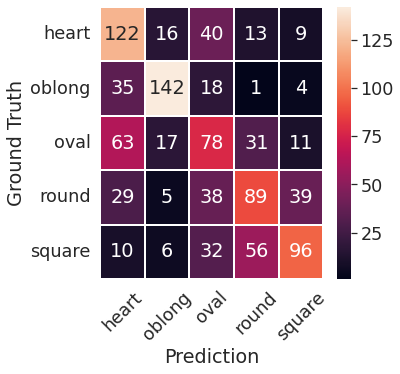

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.6)
cm = confusion_matrix(y_test, y_pred_knn, labels=model.classes_)
sns.heatmap(cm, linewidths=1, annot=True, ax=ax, fmt='g', 
            xticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            yticklabels=['heart', 'oblong', 'oval', 'round', 'square'],
            )
plt.xticks(rotation=45)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')


In [ ]:
print(classification_report(y_test, y_pred_knn,target_names=['heart', 'oblong', 'oval', 'round', 'square']))

              precision    recall  f1-score   support

       heart       0.47      0.61      0.53       200
      oblong       0.76      0.71      0.74       200
        oval       0.38      0.39      0.38       200
       round       0.47      0.45      0.46       200
      square       0.60      0.48      0.53       200

    accuracy                           0.53      1000
   macro avg       0.54      0.53      0.53      1000
weighted avg       0.54      0.53      0.53      1000

